In [3]:
from astroML import stats as astroMLstats

def bins_num (X) :

    sigmaG2 = astroMLstats.sigmaG(X) # quantile al 75 - quantile al 25
    binsize = 2.7 * sigmaG2 / (len(X)**(1/3)) #formula di Freedman-Diaconis
    N = (max(X) - min(X))/binsize

    return int(N+2)

**Misuro la posizione di una quasar N volte, distribuite gaussianamente con centro 1**

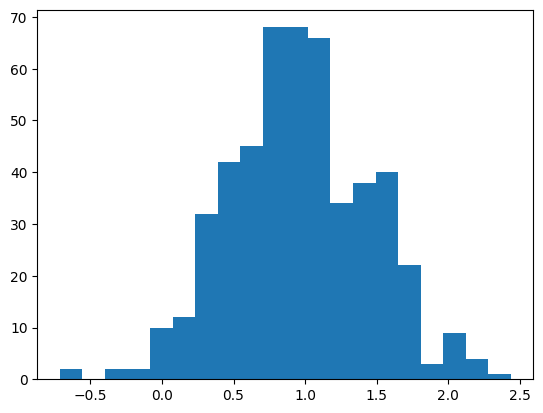

In [5]:
import numpy as np
from matplotlib import pyplot as plt

N = 500           # ripetizioni
mu = 1           # posizione vera della quasar
sigma = 0.5      # "rumore gaussiano" attorno alla posizione vera

x = np.random.normal(mu, sigma , N)

plt.hist(x, bins_num(x))
plt.show()

**Centro una gaussiana con sigma pari all'errore omoschedastico di 0,2 in ognuno dei punti generati.**

**Questo processo equivale a plottare la likelihood di ogni singola misura**

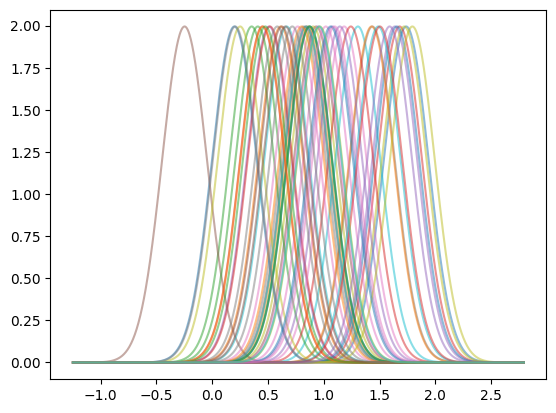

In [2]:
sigma_err = 0.2                                                 #errore omoschedastico
x_vals = np.linspace(min(x)-2*sigma, max(x)+2*sigma, 1000)      #estremi di plot

for i in range(N):
    gaussiana = (1 / (sigma_err * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - x[i]) / sigma_err) ** 2)
    plt.plot(x_vals, gaussiana, alpha=0.5)

**Plotto il prodotto delle gaussiane, cioè la likelihood dell'intero set di dati**

/tmp/ipykernel_27756/579160966.py:13: RuntimeWarning: divide by zero encountered in log
  likelihood = np.log(likelihood) #logaritmo della likelihood


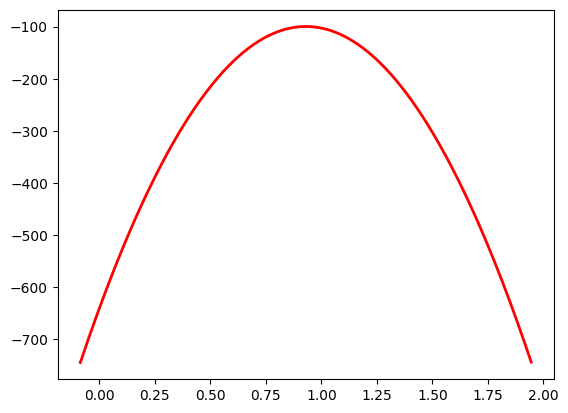

In [3]:
likelihood = []

for i in range(len(x_vals)): #calcolo la likelihood per ogni valore dell'intervallo sull'asse x

    L = 1 #reimposto ad 1 la likelihood dopo ogni ciclo

    for j in range(N): #prodotto delle PDF per ogni valore di x

        L *= (1 / (sigma_err * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x[j] - x_vals[i]) / sigma_err) ** 2) 
        
    likelihood.append(L)
        
likelihood = np.log(likelihood) #logaritmo della likelihood

plt.plot(x_vals, likelihood, color='red', linewidth=2)

**Cerco il max della log likelihood**

In [4]:
x_max_log_like = x_vals[np.argmax(likelihood)] #valore di x corrispondente al massimo della log-likelihood
print('Il valore massimo della log-likelihood è:', x_max_log_like)

# comparo ora con lo stimatore di mu
mu_hat = np.mean(x)
print('Il valore stimato di mu è:', mu_hat)

err_max_log = np.abs(x_max_log_like - mu)/mu
err_mu_hat = np.abs(mu_hat - mu)/mu

print('\n\nErrore relativo sul massimo della log-likelihood:', err_max_log)
print('Errore relativo sullo stimatore di mu:', err_mu_hat)

if (err_max_log < err_mu_hat):
    print('\n\nIl massimo della log-likelihood è uno stimatore più efficiente di mu')
else:
    print('\n\nLo stimatore di mu è più efficiente del massimo della log-likelihood')

Il valore massimo della log-likelihood è: 0.9292454330048039
Il valore stimato di mu è: 0.9298548932111455


Errore relativo sul massimo della log-likelihood: 0.07075456699519611
Errore relativo sullo stimatore di mu: 0.07014510678885455


Lo stimatore di mu è più efficiente del massimo della log-likelihood


**Stampo e valuto la matrice di fisher degli errori**

In [5]:
F_mu = N / sigma_err**2                             #dalla teoria
print("\nMatrice di Fisher (1x1):", F_mu)           #alla fine è un parametro solo...

sigma_mu = np.sqrt(1 / F_mu)

print("Errore standard atteso (deviazione standard):", sigma_mu)

print("\n------------------------------------------------------------------\n")

#provo ora a ricavarlo numericamente

dx = x_vals[1] - x_vals[0] # spaziatura uniforme dell'asse x
second_derivative = -1*np.diff(likelihood, 2) / dx**2

#devo valutare la derivata al massimo, ma scopro (CHAT GPT) che np.diff scala gli indici

index_max = np.argmax(likelihood) #questo è il massimo della log likelihood

# la derivata seconda ha lunghezza N-2 
index_fisher = index_max - 2  

F_mu = second_derivative[index_fisher] #valuto la derivata seconda all'indice giusto
print("Stima numerica della Fisher Information:", F_mu)

# usando il limite di Cramer - Rao
sigma_mu_numerica = np.sqrt(1 / F_mu)

print("Errore standard numerico atteso su mu:", sigma_mu_numerica)



Matrice di Fisher (1x1): 1249.9999999999998
Errore standard atteso (deviazione standard): 0.028284271247461905

------------------------------------------------------------------

Stima numerica della Fisher Information: 1250.0000000006203
Errore standard numerico atteso su mu: 0.028284271247454883


/mnt/c/Users/ASUS/Desktop/WSL_Shared/myenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1515: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


**Plotto due gaussiane con centro stimato sopra sopra e errore stimato sopra**

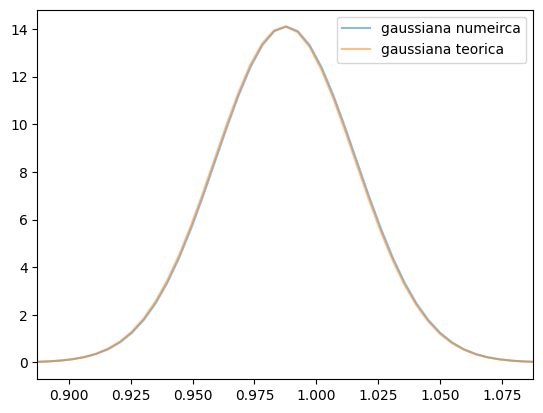

In [115]:
gaussiana1 = (1 / (sigma_mu_numerica * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - x_max_log_like) / sigma_mu_numerica) ** 2)
gaussiana2 = (1 / (sigma_mu * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - mu_hat) / sigma_mu) ** 2)

plt.plot(x_vals, gaussiana1, alpha=0.5, label = "gaussiana numeirca")
plt.plot(x_vals, gaussiana2, alpha=0.5, label = "gaussiana teorica")

min_plot = min(x_max_log_like,mu_hat)-0.1
max_plot = max(x_max_log_like,mu_hat)+0.1

plt.xlim(min_plot, max_plot)
plt.legend()

**Implemento ora la la parte 3, in cui genero una distribuzione gaussiana degli errori, centrati in 0,2 e con sigma 0.05**

**Cioè ripeto tutta la procedura sopra (evito commenti) generalizzando all'eteroschedasticità**

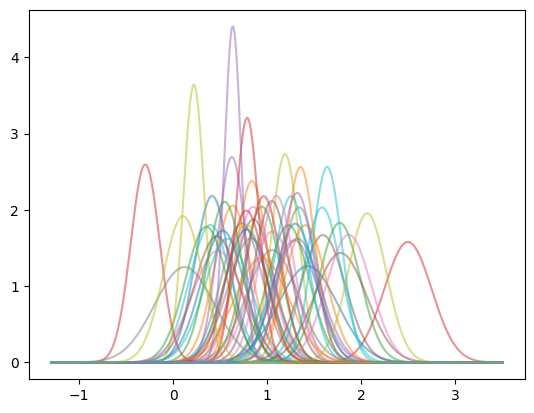

In [116]:
centro_sigma = 0.2
sigma_sigma = 0.05

val_err = np.random.normal(centro_sigma, sigma_sigma , N)

for i in range(N):
    gaussiana = (1 / (val_err[i] * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - x[i]) / val_err[i]) ** 2)
    plt.plot(x_vals, gaussiana, alpha=0.5)

/tmp/ipykernel_4264/2224431030.py:13: RuntimeWarning: divide by zero encountered in log
  likelihood = np.log(likelihood) #logaritmo della likelihood


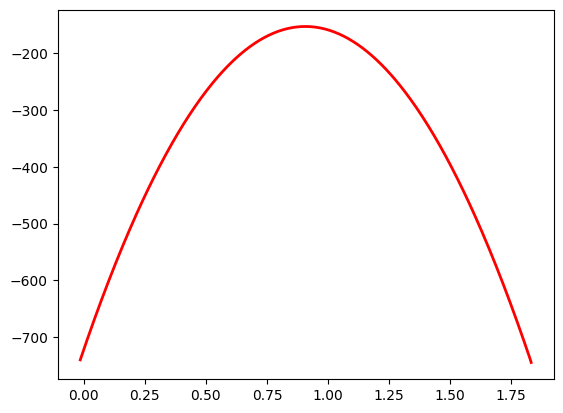

In [117]:
likelihood = []

for i in range(len(x_vals)): #calcolo la likelihood per ogni valore dell'intervallo

    L = 1

    for j in range(N): #prodotto delle PDF per ogni valore di x

        L *= (1 / (val_err[j] * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x[j] - x_vals[i]) / val_err[j]) ** 2) 
        
    likelihood.append(L)
        
likelihood = np.log(likelihood) #logaritmo della likelihood

plt.plot(x_vals, likelihood, color='red', linewidth=2)

In [118]:
x_max_log_like = x_vals[np.argmax(likelihood)] #valore di x corrispondente al massimo della log-likelihood
print('Il valore massimo della log-likelihood è:', x_max_log_like)

peso = 1 / val_err**2  # pesi inversamente proporzionali al quadrato dell'errore
media_pesata = np.sum(peso * x) / np.sum(peso)

print("Media pesata:", media_pesata)

err_max_log = np.abs(x_max_log_like - mu)/mu
err_media_pesata = np.abs(media_pesata - mu)/mu

print('\n\nErrore relativo sul massimo della log-likelihood:', err_max_log)
print('Errore relativo sulla media pesata:', err_media_pesata)

if (err_max_log < err_media_pesata):
    print('\n\nIl massimo della log-likelihood è uno stimatore più efficiente di mu')
else:
    print('\n\nLa media pesata è più efficiente del massimo della log-likelihood')

Il valore massimo della log-likelihood è: 0.906214032192378
Media pesata: 0.9070066057408683


Errore relativo sul massimo della log-likelihood: 0.09378596780762205
Errore relativo sulla media pesata: 0.09299339425913167


La media pesata è più efficiente del massimo della log-likelihood


In [119]:
err_media_pesata = np.sum(1/val_err**2)                                 #dalla teoria
print("\nMatrice di Fisher (1x1):", err_media_pesata)

sigma_mu = 1/np.sqrt(err_media_pesata)

print("Errore standard atteso (deviazione standard media pesata):", sigma_mu)

print("\n-----------------------------------------------------------------\n")

#provo ora a ricavarlo numericamente

dx = x_vals[1] - x_vals[0] # spaziatura uniforme
second_derivative = -1*np.diff(likelihood, 2) / dx**2

#devo valutare la derivata al massimo, ma scopro (CHAT GPT) che np.diff scala gli indici

index_max = np.argmax(likelihood) #questo è il massimo della log likelihood

# la derivata seconda ha lunghezza N-2 
index_fisher = index_max - 2  

F_mu = second_derivative[index_fisher] #valuto la derivata seconda all'indice giusto
print("Stima numerica della Fisher Information:", F_mu)

# usando il limite di Cramer - Rao
var_mu_numerica = 1 / F_mu
sigma_mu_numerica = np.sqrt(var_mu_numerica)

print("Errore standard numerico atteso su mu:", sigma_mu_numerica)



Matrice di Fisher (1x1): 1381.056549170364
Errore standard atteso (deviazione standard media pesata): 0.02690879618020482

-----------------------------------------------------------------

Stima numerica della Fisher Information: 1381.056549167919
Errore standard numerico atteso su mu: 0.02690879618022864


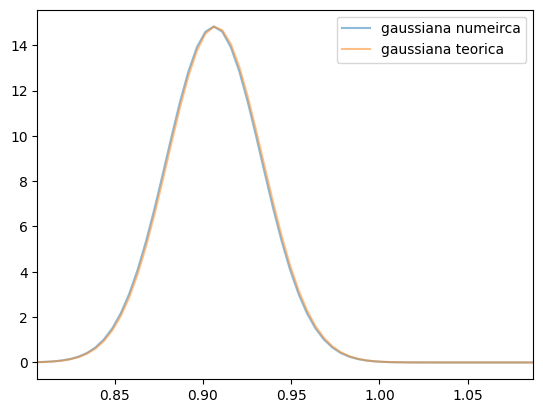

In [120]:
gaussiana1 = (1 / (sigma_mu_numerica * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - x_max_log_like) / sigma_mu_numerica) ** 2)
gaussiana2 = (1 / (sigma_mu * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - media_pesata) / sigma_mu) ** 2)

plt.plot(x_vals, gaussiana1, alpha=0.5, label = "gaussiana numeirca")
plt.plot(x_vals, gaussiana2, alpha=0.5, label = "gaussiana teorica")

min_plot = min(x_max_log_like,mu_hat)-0.1
max_plot = max(x_max_log_like,mu_hat)+0.1

plt.xlim(min_plot, max_plot)
plt.legend()